In [30]:
import mne
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = 'none'
matplotlib.rcParams['font.family'] = 'Arial'

%matplotlib inline

train_clr = 'blue'
dev_clr = 'red'
test_clr = 'green'

In [5]:
train = mne.read_epochs('../Decoding_Pos/len_matched_epochs_train_minica-epo.fif', preload=False)
dev = mne.read_epochs('../Decoding_PoS/len_matched_epochs_dev_minica-epo.fif', preload=False)
test = mne.read_epochs('../Decoding_PoS/len_matched_epochs_test_minica-epo.fif', preload=False)

Reading ../Decoding_Pos/freq_matched_epochs_train_minica-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =       0.00 ...     700.00 ms
        0 CTF compensation matrices available
Reading ../Decoding_Pos\freq_matched_epochs_train_minica-epo-1.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =       0.00 ...     700.00 ms
        0 CTF compensation matrices available
Adding metadata with 18 columns
Replacing existing metadata with 18 columns
51364 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading ../Decoding_PoS/freq_matched_epochs_dev_minica-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =       0.00 ...     700.00 ms


# Train

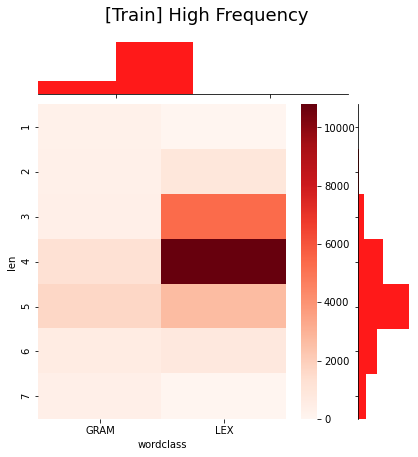

<Figure size 288x360 with 0 Axes>

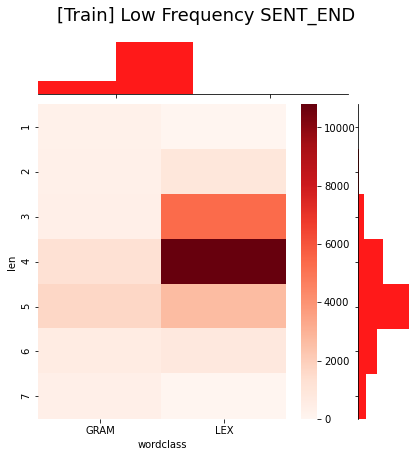

<Figure size 288x360 with 0 Axes>

In [26]:
tmp = train.metadata

long_freq = tmp.query(f'len > 4').freq
long_class = tmp.query(f'len > 4').wordclass
long_class = long_class.replace(('LEX', 'GRAM'), (1,0))

short_freq = tmp.query(f'len < 4').freq
short_class = tmp.query(f'len < 4').wordclass
short_class = short_class.replace(('LEX', 'GRAM'), (1,0))

long = tmp.query('len > 4')
long = long.query('wordclass == "LEX" or wordclass == "GRAM"')
long_freq_class = long[['wordclass', 'freq']]
long_crosstab = pd.crosstab(long_freq_class.len, long_freq_class.wordclass)

short = tmp.query('len <= 4')
short = short.query('wordclass == "LEX" or wordclass == "GRAM"')
short_len_class = short[['wordclass', 'freq']]
short_crosstab = pd.crosstab(short_freq_class.len, short_freq_class.wordclass)

crosstab = short_crosstab

class jp:
    def __call__(self, x, y):
        ax=plt.gca()
        plt.figure(figsize=(4,5))
        sns.heatmap(crosstab, cmap="Reds", ax=ax)

g = sns.JointGrid(x=short_freq_class.len, y=short_freq_class.wordclass).plot_joint(jp())

_ = g.ax_marg_x.hist(hf_class, color=matched_clr, alpha=0.9, bins=2)
_ = g.ax_marg_y.hist(hf_len, color=matched_clr, alpha=0.9, orientation='horizontal', bins=np.arange(1, 8, 1))
_ = g.ax_marg_y.set_label('LEX / GRAM')
_ = g.fig.suptitle(f"[Train] High Frequency", fontsize=18, y=1.05) 
g.savefig(f'len_train_hf.svg', format='svg')

crosstab = lf_crosstab

class jp:
    def __call__(self, x, y):
        ax=plt.gca()
        plt.figure(figsize=(4,5))
        sns.heatmap(crosstab, cmap="Reds", ax=ax)
        
g = sns.JointGrid(x=lf_len_class.len, y=lf_len_class.wordclass).plot_joint(jp())

_ = g.ax_marg_x.hist(lf_class, color=matched_clr, alpha=0.9, bins=2)
_ = g.ax_marg_y.hist(lf_len, color=matched_clr, alpha=0.9, orientation='horizontal', bins=np.arange(1, 8, 1))
_ = g.ax_marg_y.set_label('LEX / GRAM')
_ = g.fig.suptitle(f"[Train] Low Frequency {sent_pos}", fontsize=18, y=1.05)
g.savefig(f'len_train_lf.svg', format='svg')

# Dev

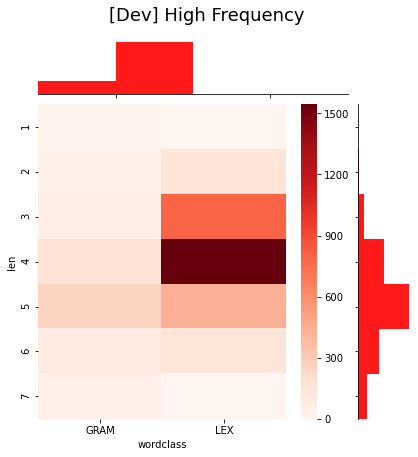

<Figure size 288x360 with 0 Axes>

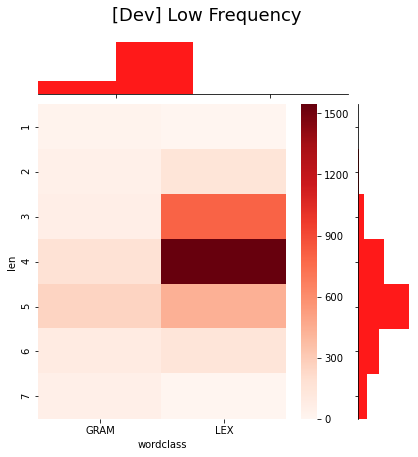

<Figure size 288x360 with 0 Axes>

In [28]:
tmp = dev.metadata

lf_len = tmp.query(f'freq <= 5.91').len
lf_class = tmp.query(f'freq <= 5.91').wordclass
lf_class = lf_class.replace(('LEX', 'GRAM'), (1,0))

hf_len = tmp.query(f'freq > 5.91').len
hf_class = tmp.query(f'freq > 5.91').wordclass
hf_class = hf_class.replace(('LEX', 'GRAM'), (1,0))

lf = tmp.query('freq <= 5.91')
lf = lf.query('wordclass == "LEX" or wordclass == "GRAM"')
lf_len_class = lf[['wordclass', 'len']]
lf_crosstab = pd.crosstab(lf_len_class.len, lf_len_class.wordclass)

hf = tmp.query('freq > 5.91')
hf = hf.query('wordclass == "LEX" or wordclass == "GRAM"')
hf_len_class = hf[['wordclass', 'len']]
hf_crosstab = pd.crosstab(hf_len_class.len, hf_len_class.wordclass)

crosstab = hf_crosstab

class jp:
    def __call__(self, x, y):
        ax=plt.gca()
        plt.figure(figsize=(4,5))
        sns.heatmap(crosstab, cmap="Reds", ax=ax)

g = sns.JointGrid(x=hf_len_class.len, y=hf_len_class.wordclass).plot_joint(jp())

_ = g.ax_marg_x.hist(hf_class, color=matched_clr, alpha=0.9, bins=2)
_ = g.ax_marg_y.hist(hf_len, color=matched_clr, alpha=0.9, orientation='horizontal', bins=np.arange(1, 8, 1))
_ = g.ax_marg_y.set_label('LEX / GRAM')
_ = g.fig.suptitle(f"[Dev] High Frequency", fontsize=18, y=1.05) 
g.savefig(f'len_dev_hf.svg', format='svg')

crosstab = lf_crosstab

class jp:
    def __call__(self, x, y):
        ax=plt.gca()
        plt.figure(figsize=(4,5))
        sns.heatmap(crosstab, cmap="Reds", ax=ax)
        
g = sns.JointGrid(x=lf_len_class.len, y=lf_len_class.wordclass).plot_joint(jp())

_ = g.ax_marg_x.hist(lf_class, color=matched_clr, alpha=0.9, bins=2)
_ = g.ax_marg_y.hist(lf_len, color=matched_clr, alpha=0.9, orientation='horizontal', bins=np.arange(1, 8, 1))
_ = g.ax_marg_y.set_label('LEX / GRAM')
_ = g.fig.suptitle(f"[Dev] Low Frequency", fontsize=18, y=1.05)
g.savefig(f'len_dev_lf.svg', format='svg')

## Test

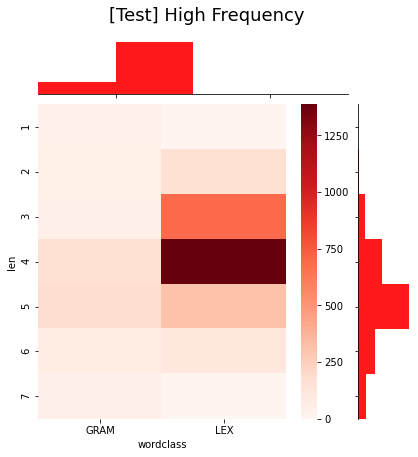

<Figure size 288x360 with 0 Axes>

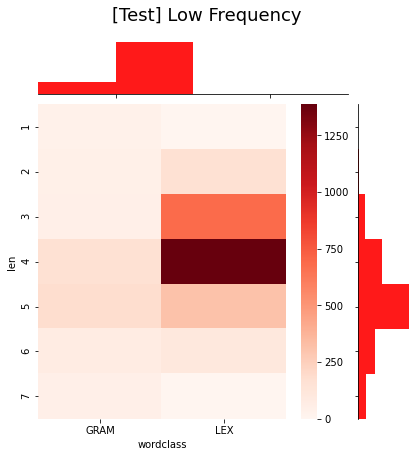

<Figure size 288x360 with 0 Axes>

In [29]:
tmp = test.metadata

lf_len = tmp.query(f'freq <= 5.91').len
lf_class = tmp.query(f'freq <= 5.91').wordclass
lf_class = lf_class.replace(('LEX', 'GRAM'), (1,0))

hf_len = tmp.query(f'freq > 5.91').len
hf_class = tmp.query(f'freq > 5.91').wordclass
hf_class = hf_class.replace(('LEX', 'GRAM'), (1,0))

lf = tmp.query('freq <= 5.91')
lf = lf.query('wordclass == "LEX" or wordclass == "GRAM"')
lf_len_class = lf[['wordclass', 'len']]
lf_crosstab = pd.crosstab(lf_len_class.len, lf_len_class.wordclass)

hf = tmp.query('freq > 5.91')
hf = hf.query('wordclass == "LEX" or wordclass == "GRAM"')
hf_len_class = hf[['wordclass', 'len']]
hf_crosstab = pd.crosstab(hf_len_class.len, hf_len_class.wordclass)

crosstab = hf_crosstab

class jp:
    def __call__(self, x, y):
        ax=plt.gca()
        plt.figure(figsize=(4,5))
        sns.heatmap(crosstab, cmap="Reds", ax=ax)

g = sns.JointGrid(x=hf_len_class.len, y=hf_len_class.wordclass).plot_joint(jp())

_ = g.ax_marg_x.hist(hf_class, color=matched_clr, alpha=0.9, bins=2)
_ = g.ax_marg_y.hist(hf_len, color=matched_clr, alpha=0.9, orientation='horizontal', bins=np.arange(1, 8, 1))
_ = g.ax_marg_y.set_label('LEX / GRAM')
_ = g.fig.suptitle(f"[Test] High Frequency", fontsize=18, y=1.05) 
g.savefig(f'len_test_hf.svg', format='svg')

crosstab = lf_crosstab

class jp:
    def __call__(self, x, y):
        ax=plt.gca()
        plt.figure(figsize=(4,5))
        sns.heatmap(crosstab, cmap="Reds", ax=ax)
        
g = sns.JointGrid(x=lf_len_class.len, y=lf_len_class.wordclass).plot_joint(jp())

_ = g.ax_marg_x.hist(lf_class, color=matched_clr, alpha=0.9, bins=2)
_ = g.ax_marg_y.hist(lf_len, color=matched_clr, alpha=0.9, orientation='horizontal', bins=np.arange(1, 8, 1))
_ = g.ax_marg_y.set_label('LEX / GRAM')
_ = g.fig.suptitle(f"[Test] Low Frequency", fontsize=18, y=1.05)
g.savefig(f'len_test_lf.svg', format='svg')